<a href="https://colab.research.google.com/github/Nishilhmodi/House_Price_Prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# importing the dataset
dataset = pd.read_csv('/content/house_price_regression_dataset.csv')

In [3]:
# printing top 5 lines
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
# printing bottom 5 lines
dataset.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [5]:
# check shape
dataset.shape

(1000, 8)

In [6]:
# check for missing values
dataset.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [7]:
# getting information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [8]:
# Check for duplicates
duplicates = dataset.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# Remove duplicates (if any)
dataset_no_duplicates = dataset.drop_duplicates()
# Verify the removal
print(f"Shape of original dataset: {dataset.shape}")
print(f"Shape of dataset after removing duplicates: {dataset_no_duplicates.shape}")

Number of duplicate rows: 0
Shape of original dataset: (1000, 8)
Shape of dataset after removing duplicates: (1000, 8)


In [9]:
from sklearn.preprocessing import StandardScaler
# Assuming 'dataset' is your DataFrame and you want to scale numerical features
numerical_cols = dataset.select_dtypes(include=np.number).columns
# Create a StandardScaler object
scaler = StandardScaler()
# Fit and transform the numerical features
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

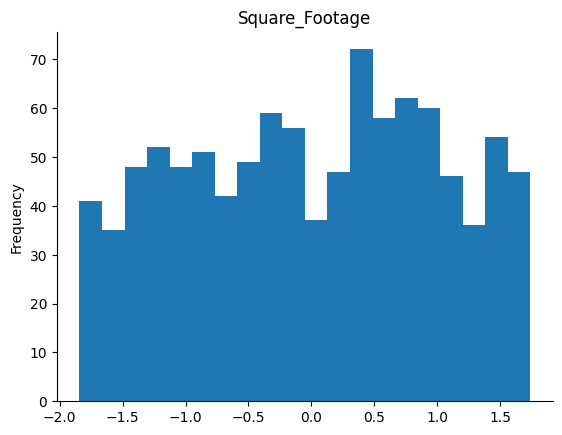

In [10]:
dataset['Square_Footage'].plot(kind='hist', bins=20, title='Square_Footage')
plt.gca().spines[['top', 'right',]].set_visible(False)

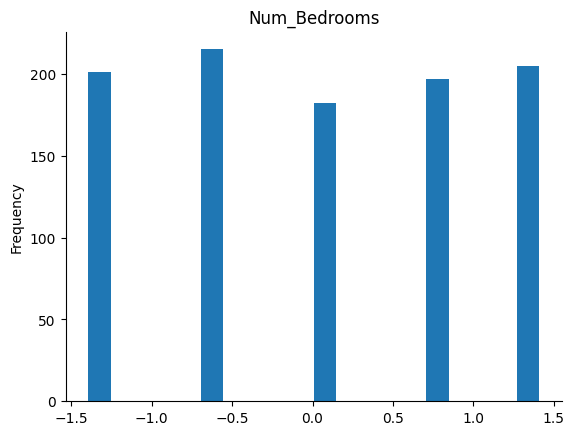

In [11]:
dataset['Num_Bedrooms'].plot(kind='hist', bins=20, title='Num_Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

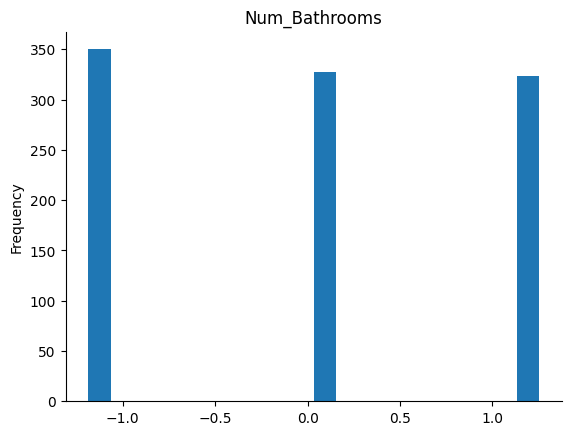

In [12]:
dataset['Num_Bathrooms'].plot(kind='hist', bins=20, title='Num_Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

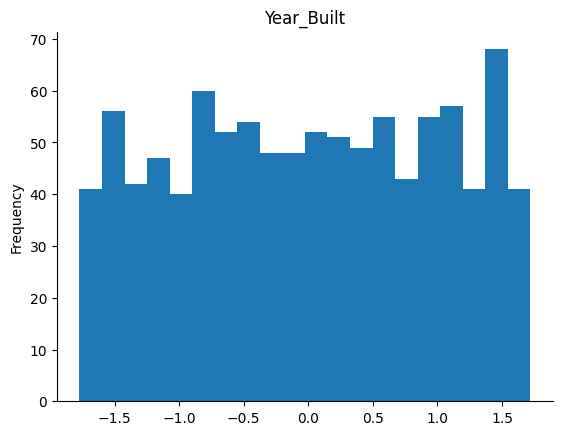

In [13]:
dataset['Year_Built'].plot(kind='hist', bins=20, title='Year_Built')
plt.gca().spines[['top', 'right',]].set_visible(False)

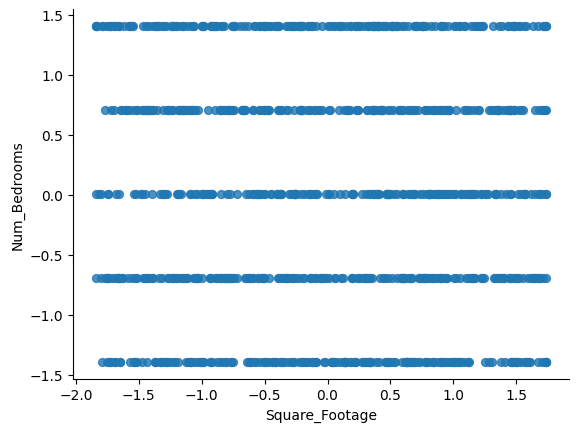

In [14]:
# title Square_Footage vs Num_Bedrooms
dataset.plot(kind='scatter', x='Square_Footage', y='Num_Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

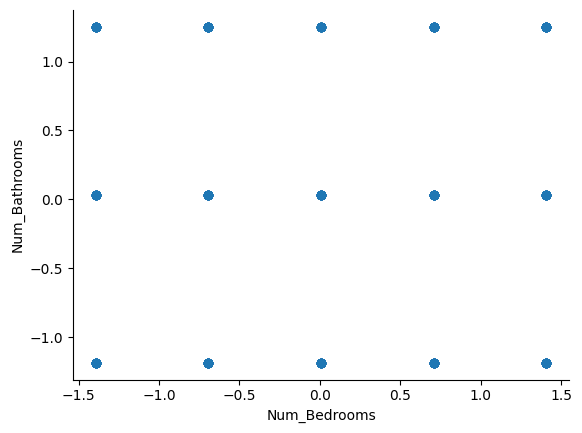

In [15]:
# title Num_Bedrooms vs Num_Bathrooms
dataset.plot(kind='scatter', x='Num_Bedrooms', y='Num_Bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

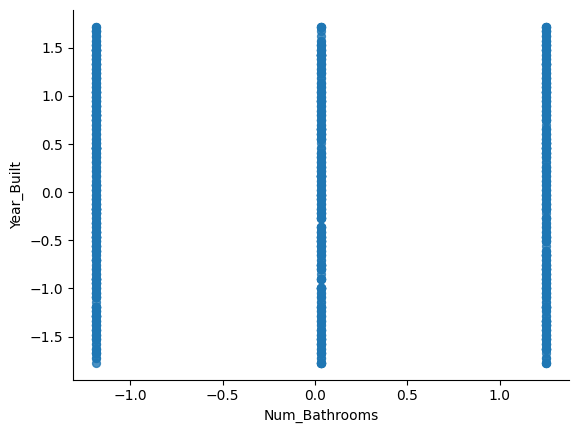

In [16]:
# title Num_Bathrooms vs Year_Built
dataset.plot(kind='scatter', x='Num_Bathrooms', y='Year_Built', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

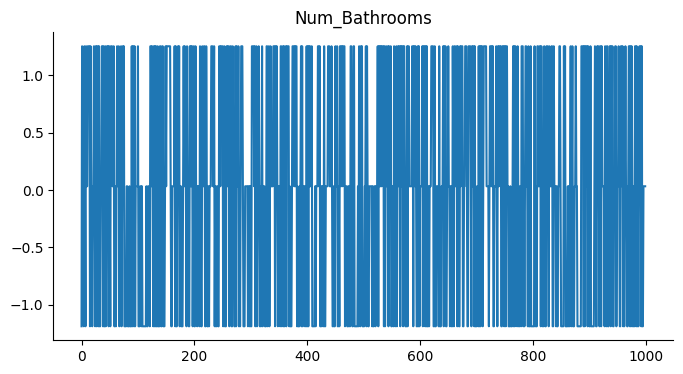

In [17]:
# title Num_Bathrooms
dataset['Num_Bathrooms'].plot(kind='line', figsize=(8, 4), title='Num_Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

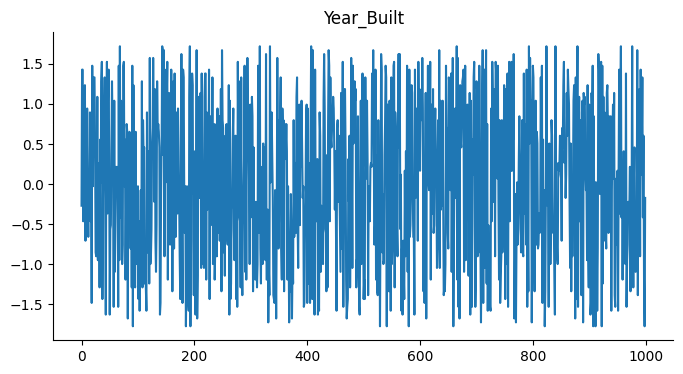

In [18]:
# title Year_Built
dataset['Year_Built'].plot(kind='line', figsize=(8, 4), title='Year_Built')
plt.gca().spines[['top', 'right']].set_visible(False)

In [19]:
# Assuming 'dataset' is your DataFrame
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Example usage for 'Square_Footage'
dataset_no_outliers_sf = remove_outliers_iqr(dataset, 'Square_Footage')

# Example usage for 'Lot_Size'
dataset_no_outliers_ls = remove_outliers_iqr(dataset, 'Lot_Size')

# You can apply this function to other columns as needed, e.g., 'Num_Bedrooms', 'Num_Bathrooms', etc.
# Example:
# dataset_no_outliers_bedrooms = remove_outliers_iqr(dataset, 'Num_Bedrooms')

#To remove outliers from multiple columns at once:
columns_to_check = ['Square_Footage', 'Lot_Size', 'Num_Bedrooms', 'Num_Bathrooms']
for col in columns_to_check:
    dataset = remove_outliers_iqr(dataset, col)

print(f"Shape of dataset after removing outliers: {dataset.shape}")

Shape of dataset after removing outliers: (1000, 8)


<Figure size 1000x600 with 0 Axes>

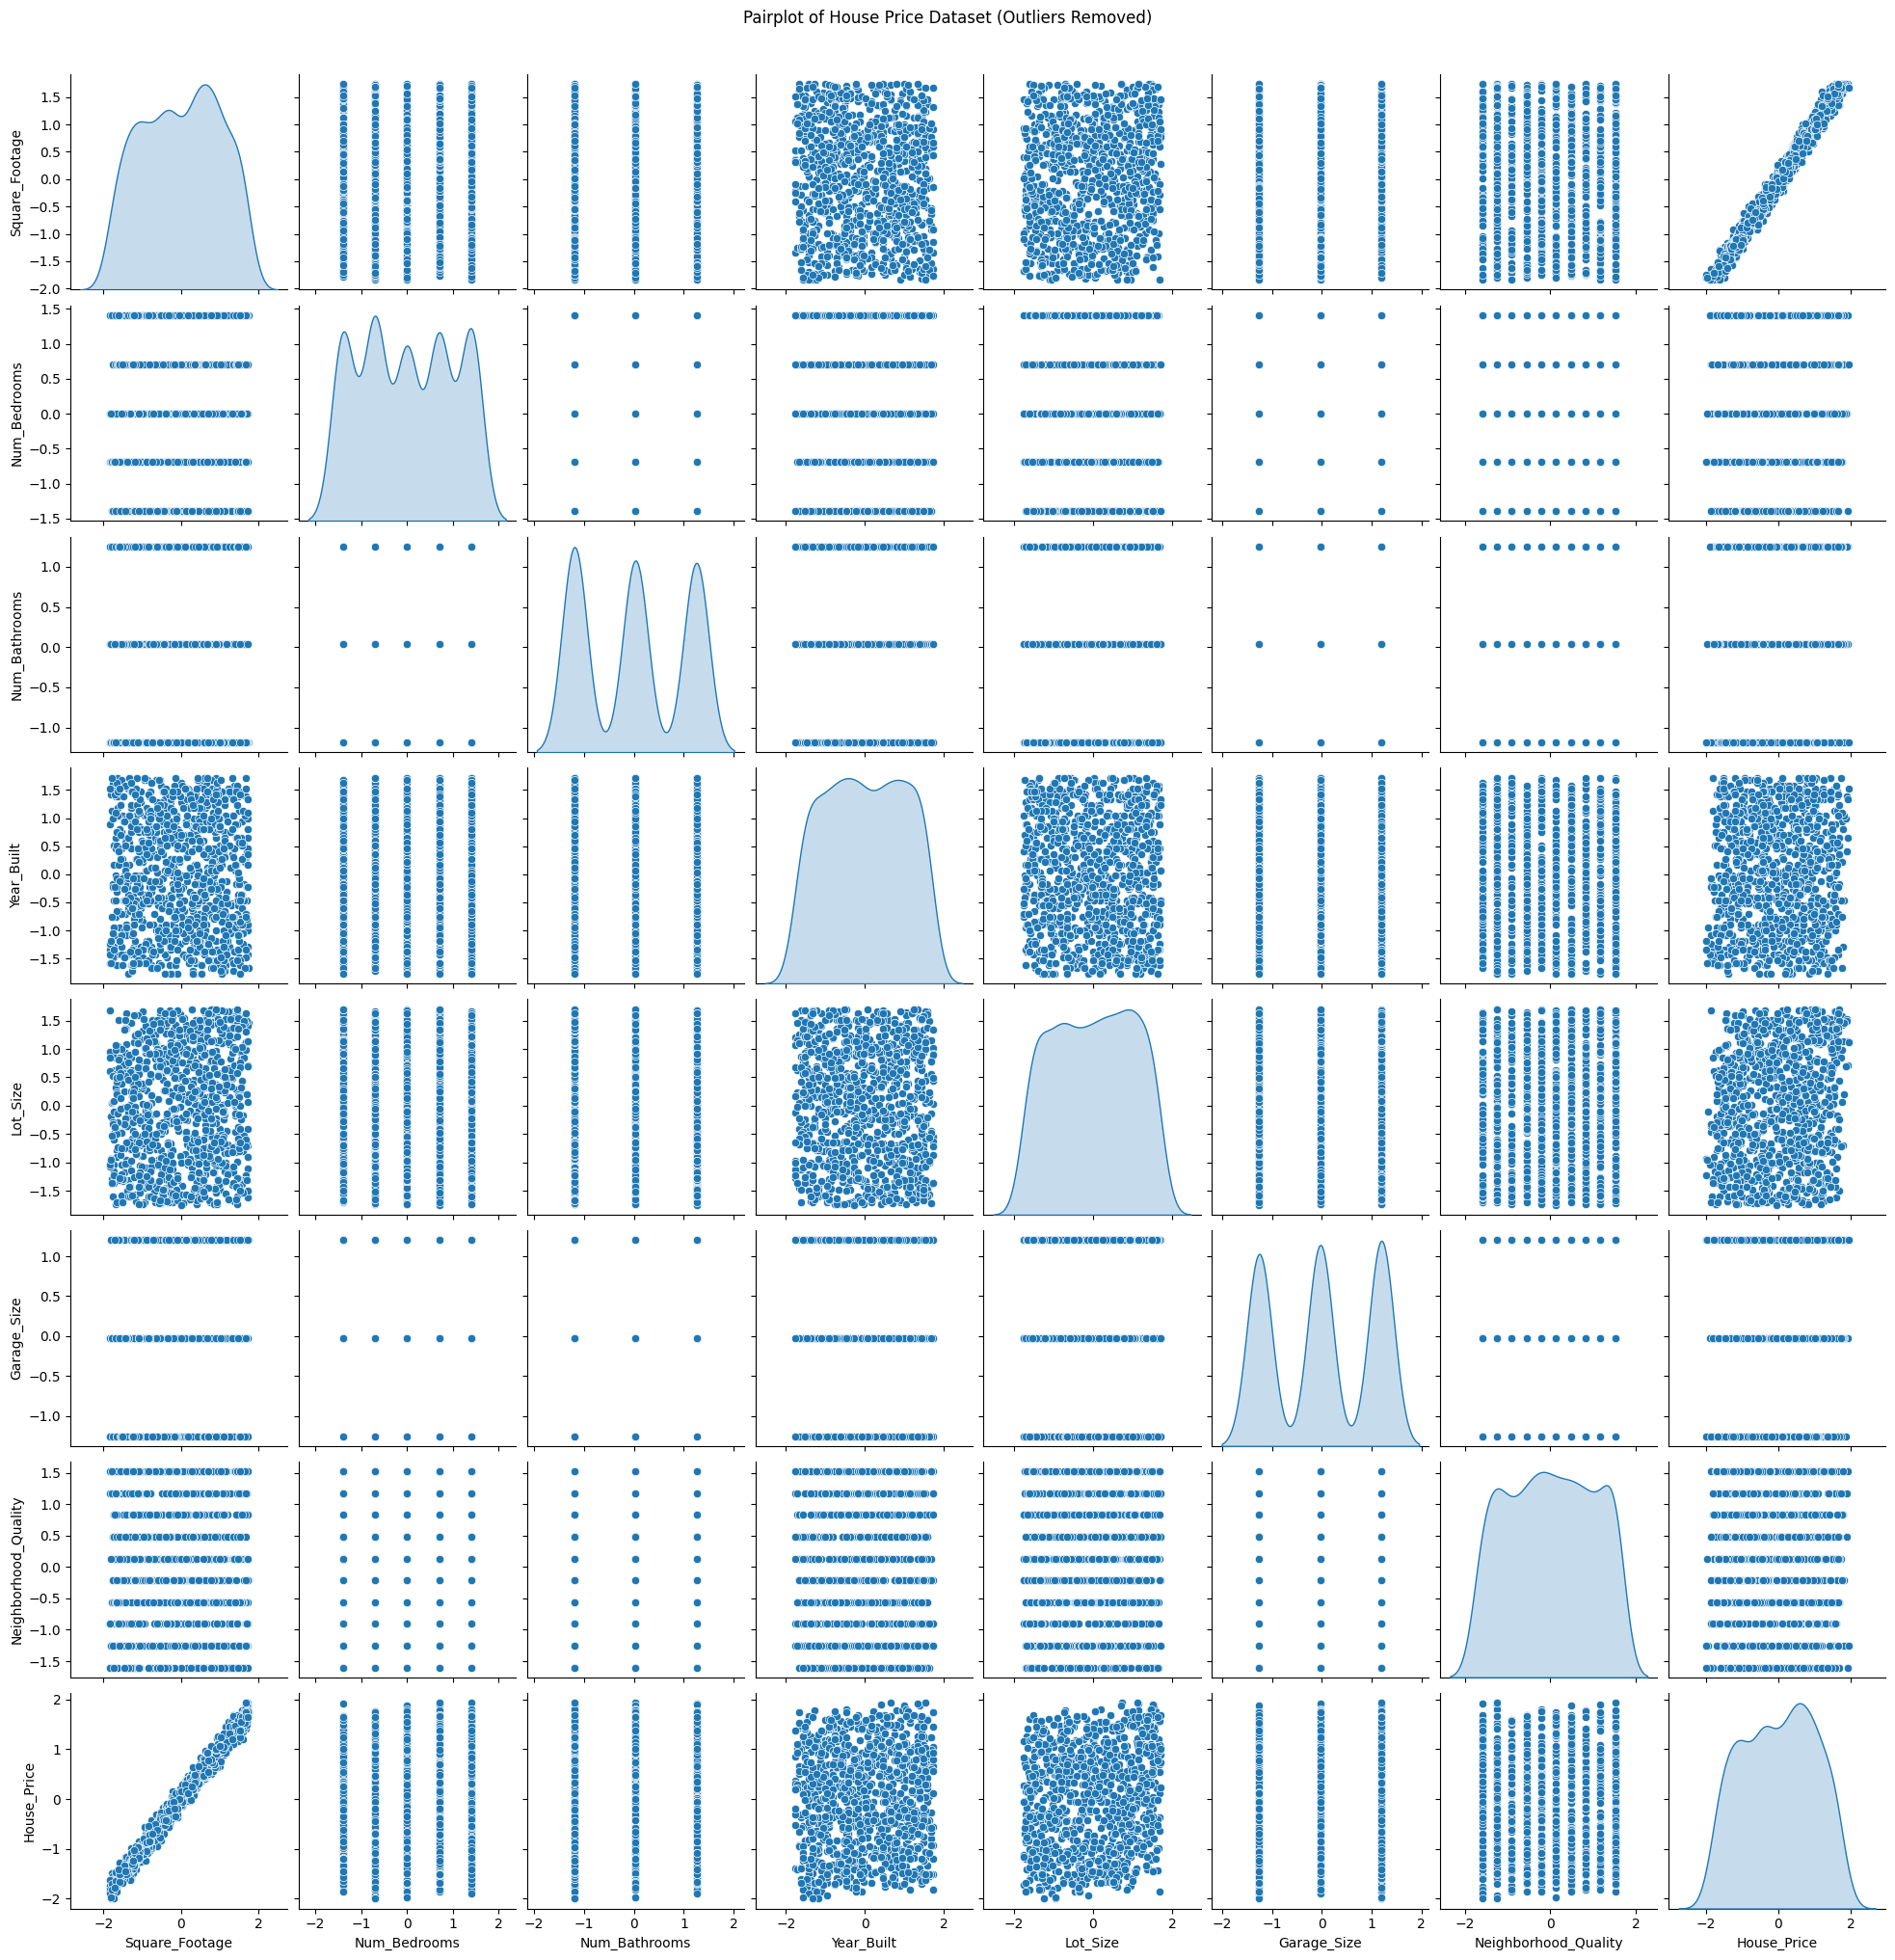

In [20]:
# Create the plot after outlier removal
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.pairplot(dataset, diag_kind='kde') # Use 'kde' for Kernel Density Estimation
plt.suptitle('Pairplot of House Price Dataset (Outliers Removed)', y=1.02)
plt.show()

In [21]:
# devide the dataset into x & y
x = dataset.drop(['House_Price'],axis=1)
y = dataset['House_Price']

In [22]:
print(x)
print("------")
print(y)

     Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0         -1.159803     -0.693836      -1.186699   -0.269122 -1.679278   
1          1.160724      0.007008       1.252559    1.428045  1.522390   
2          0.618843     -1.394681       0.032930    1.428045  0.660422   
3         -1.473776     -1.394681       0.032930   -0.463084 -0.036555   
4          1.681887     -0.693836      -1.186699    0.312764  1.480809   
..              ...           ...            ...         ...       ...   
995        0.355074      0.707853      -1.186699   -0.414594 -0.472519   
996        0.289730     -1.394681       0.032930    0.603707  0.153428   
997       -0.166885      0.707853       0.032930   -1.190442  0.984371   
998        1.520119      1.408698       0.032930   -1.772328 -0.653046   
999        0.360652      0.707853       0.032930   -0.172141  0.254925   

     Garage_Size  Neighborhood_Quality  
0      -1.254658             -0.213126  
1      -0.027008             

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


In [25]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Define the base models
model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=5) # Example hyperparameter tuning
model3 = SVR(kernel='rbf', C=10) # Example hyperparameter tuning


# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('svr', model3)])

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"predictions : {y_pred}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared:{r2}")

predictions : [-0.05762984 -1.54277313  1.36957452  1.54417244  0.59922518  1.44580932
 -0.39460147 -1.14096457  0.85042994 -0.28533024 -0.53157516  0.58195997
  1.48084862 -1.69625536 -1.03553304 -1.26673417 -0.49231877 -0.76642402
 -1.49130626 -1.5411283  -1.47305816 -1.58168655 -0.74620175  0.09583016
  1.11181598  0.74662837 -1.34580138 -1.44443864  1.57111595  0.46482482
  0.16047542  1.0156357   1.52744365  1.03383203  0.22521232  0.70062386
 -0.09238326 -0.46272524  0.35579719  1.47569553 -0.55894528 -0.69833345
 -0.32155165 -1.54373081 -0.31406224 -0.49104962 -1.54556363  0.48755777
  0.04298097  0.64260577  1.43927642 -0.65194665  0.4440774  -0.7655487
 -1.30482764 -0.26366315  0.42336827  1.0156541   0.5556042   0.43740303
 -0.44004207  0.11946269 -0.64294242  0.32193026  0.42593437 -0.97492401
 -0.11652251  0.58614561 -1.08336232  1.59915173  0.54503676  1.55335867
  0.25727096  0.98426133  0.72273264  0.77550055  1.20698419 -0.11038148
 -0.41478293  0.62536949  1.43044595  

predictions : [-0.05762984 -1.54277313  1.36957452  1.54417244  0.59922518  1.44580932
 -0.39460147 -1.14096457  0.85042994 -0.28533024 -0.53157516  0.58195997
  1.48084862 -1.69625536 -1.03553304 -1.26673417 -0.49231877 -0.76642402
 -1.49130626 -1.5411283  -1.47305816 -1.58168655 -0.74620175  0.09583016
  1.11181598  0.74662837 -1.34580138 -1.44443864  1.57111595  0.46482482
  0.16047542  1.0156357   1.52744365  1.03383203  0.22521232  0.70062386
 -0.09238326 -0.46272524  0.35579719  1.47569553 -0.55894528 -0.69833345
 -0.32155165 -1.54373081 -0.31406224 -0.49104962 -1.54556363  0.48755777
  0.04298097  0.64260577  1.43927642 -0.65194665  0.4440774  -0.7655487
 -1.30482764 -0.26366315  0.42336827  1.0156541   0.5556042   0.43740303
 -0.44004207  0.11946269 -0.64294242  0.32193026  0.42593437 -0.97492401
 -0.11652251  0.58614561 -1.08336232  1.59915173  0.54503676  1.55335867
  0.25727096  0.98426133  0.72273264  0.77550055  1.20698419 -0.11038148
 -0.41478293  0.62536949  1.43044595  

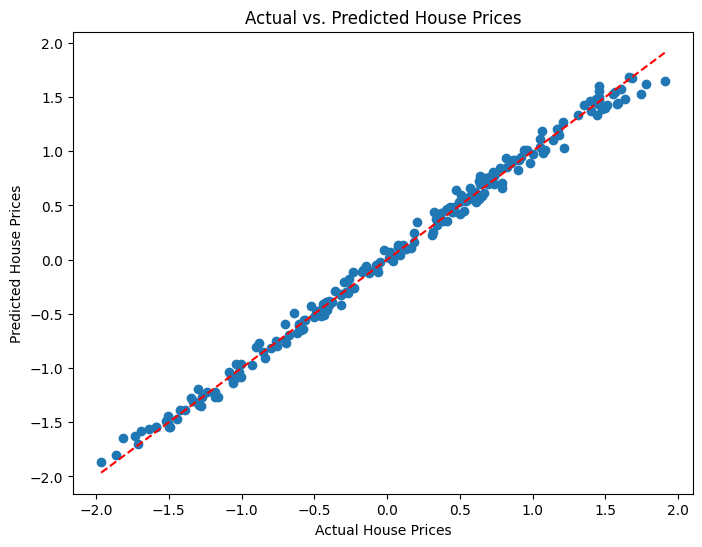

In [26]:
# Remove the confusion matrix calculation

# Evaluate the model (this part is already in your code)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"predictions : {y_pred}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Instead of a confusion matrix, consider visualizing predicted vs. actual values:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line
plt.show()